### You are given a dataset of credit card transactions. The dataset contains 8500 customers and their activity over a 6-month period. Each transaction is characterized by 18 features described below.

### Your task is to find the most useful customer segmentation to improve the marketing campaigns of the company.

#### Initial Plan
- look for Nan/missing values
- evaluate data types, do we need to convert?
- look at distribution
- do we need to scale?





In [204]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [148]:
data = pd.read_csv('card_transactions.csv')

In [149]:
data.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [150]:
data.describe()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8499.000000,8500.000000,8500.000000,8202.000000,8500.000000
mean,1565.941403,999.561312,973.508540,588.165365,0.876272,411.708492,0.489383,0.201940,0.363796,0.135288,3.253647,14.677059,4485.848704,11.516118,1721.250989,865.594683,0.152587
std,2090.513302,2154.189460,2078.539061,1669.466184,0.237517,910.142440,0.401075,0.297756,0.397162,0.200892,6.854883,25.001561,3629.804040,1.339121,2893.200899,2389.297977,0.291505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,6.000000,0.000000,0.019163,0.000000
25%,126.318369,39.000000,0.000000,0.000000,0.875000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,12.000000,381.893717,168.712104,0.000000
50%,869.046468,360.000000,0.000000,37.400000,1.000000,89.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,12.000000,851.146953,310.399040,0.000000
75%,2053.674410,1105.897500,1113.726110,570.410000,1.000000,466.725000,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,12.000000,1897.014052,826.426929,0.142857
max,19043.138560,49039.570000,47137.211760,40761.250000,1.000000,22500.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,12.000000,50721.483360,76406.207520,1.000000


In [151]:
data = data.drop(columns=['customer_id'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134dde470>,
      dtype=object)

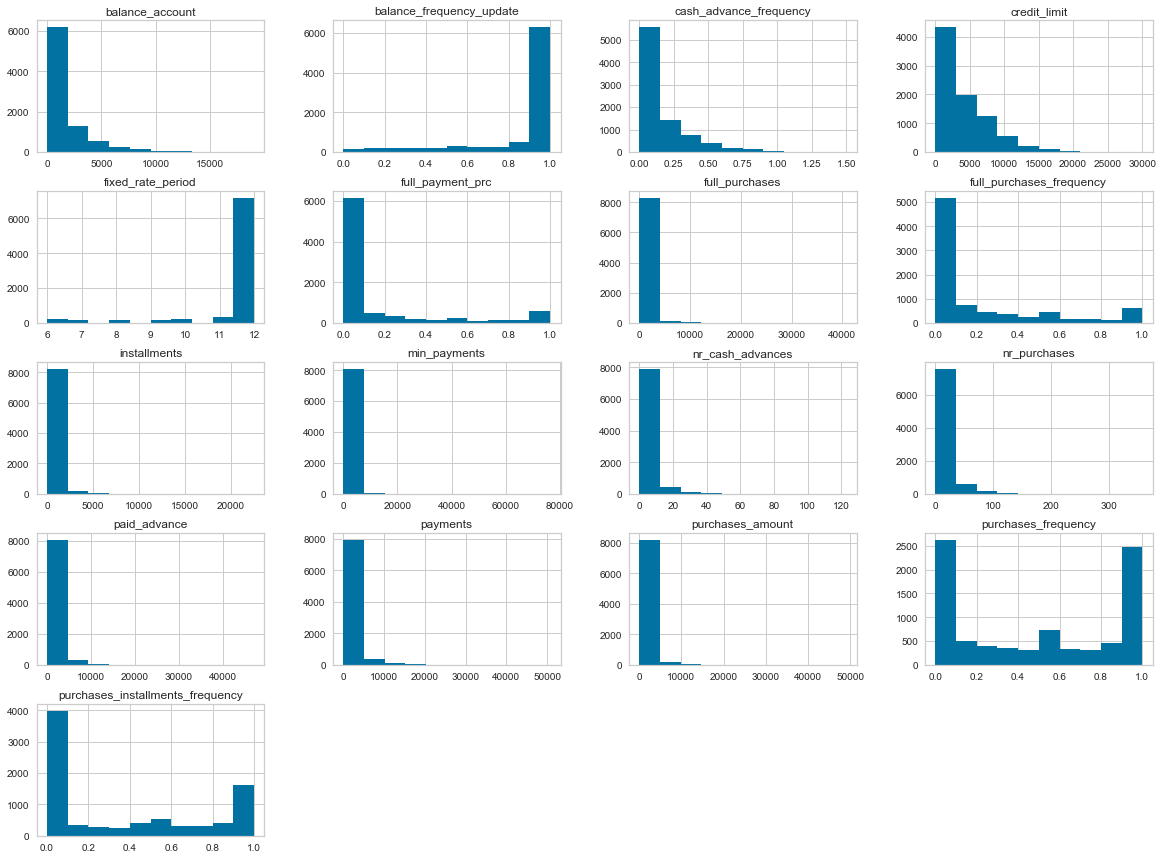

In [152]:
data.hist(figsize=(20,15))

In [153]:
#does the data contain any missing values
data.isna().values.any()

True

In [154]:
#what would the data look like if we applied a normalization function to it
from sklearn.preprocessing import QuantileTransformer
import numpy as np
qt = QuantileTransformer(output_distribution='normal',n_quantitles='n_samples')
data_normal = pd.DataFrame(qt.fit_transform(data))

TypeError: __init__() got an unexpected keyword argument 'n_quantitles'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134dde2e8>,
      dtype=object)

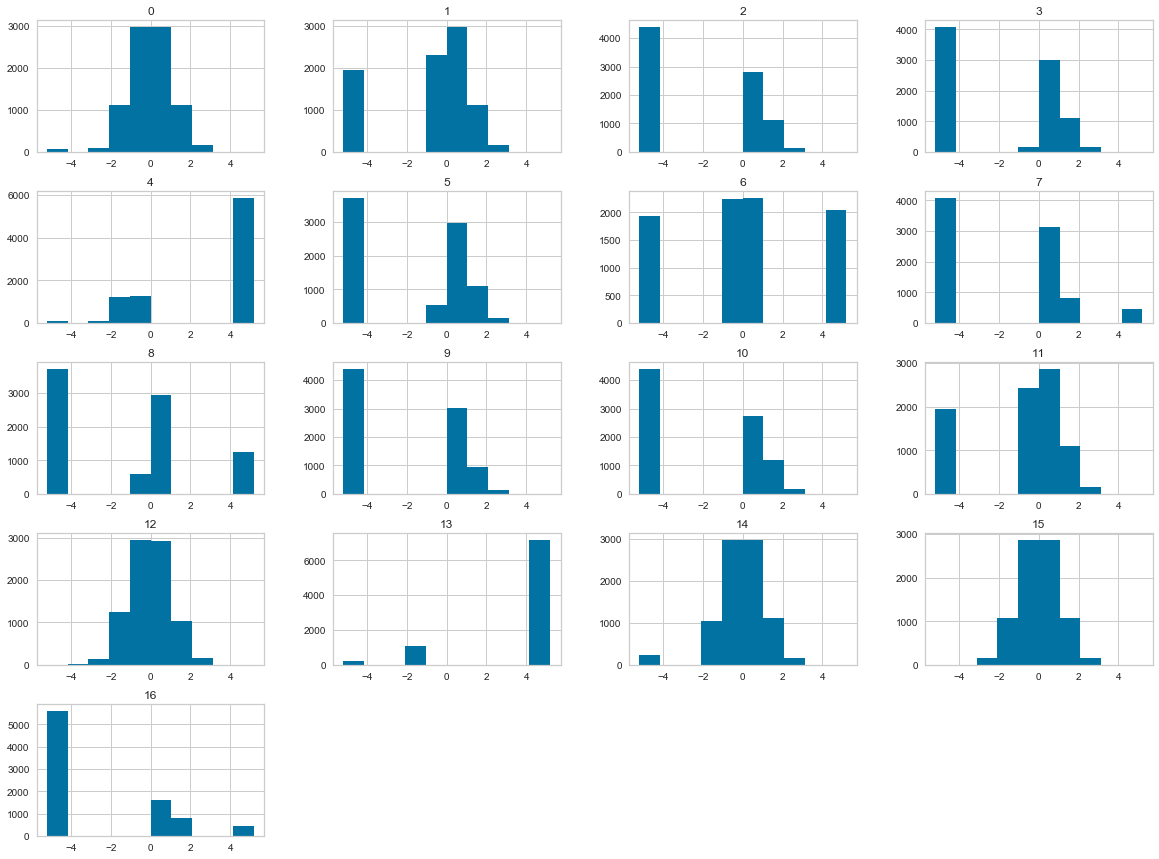

In [155]:
data_normal.hist(figsize=(20,15))

In [156]:
# credit_limit and min_payments have missing values
data.isna().any()

balance_account                     False
purchases_amount                    False
paid_advance                        False
full_purchases                      False
balance_frequency_update            False
installments                        False
purchases_frequency                 False
full_purchases_frequency            False
purchases_installments_frequency    False
cash_advance_frequency              False
nr_cash_advances                    False
nr_purchases                        False
credit_limit                         True
fixed_rate_period                   False
payments                            False
min_payments                         True
full_payment_prc                    False
dtype: bool

In [157]:
#investigating if we dropped all the rows with missing values...
data.dropna(axis=0)
#if we remove rows with na we remove 299 rows

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,2707.058356,2018.13,0.000000,1545.23,1.000000,472.90,0.750000,0.250000,0.666667,0.000000,0,26,7000.0,12,2575.541309,661.487315,0.000000
8495,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1,0,8500.0,12,662.387331,260.277533,0.000000
8496,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,12,141.974905,150.500248,0.166667
8498,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2,51,3000.0,12,462.848132,497.408854,0.000000


In [158]:
# Count total NaN at each column in DataFrame
data.isnull().sum()

balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

In [187]:
#confirm if all data is unqiue to a customer, or if there are multiple transactions by the same customer
len(data['customer_id'].unique())
#all the transactional data is unique

KeyError: 'customer_id'

In [160]:
#investigating if there is any correlation with credit_limit and min_payments that would 
#allow us to predict values to impute to missing values
data.corr()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
balance_account,1.000000,0.183230,0.494670,0.166333,0.323815,0.128447,-0.075379,0.074418,-0.060572,0.451518,0.384958,0.158572,0.537968,0.074861,0.320103,0.398684,-0.316803
purchases_amount,0.183230,1.000000,-0.050233,0.917602,0.132702,0.683815,0.389758,0.494237,0.314577,-0.119110,-0.066170,0.687582,0.357241,0.085065,0.608846,0.093093,0.179184
paid_advance,0.494670,-0.050233,1.000000,-0.029656,0.099586,-0.064626,-0.214265,-0.087259,-0.176054,0.633091,0.656019,-0.073962,0.306451,-0.068684,0.446167,0.142299,-0.152665
full_purchases,0.166333,0.917602,-0.029656,1.000000,0.103325,0.337465,0.262255,0.519476,0.127911,-0.082180,-0.045548,0.543708,0.319840,0.063237,0.575285,0.049498,0.132164
balance_frequency_update,0.323815,0.132702,0.099586,0.103325,1.000000,0.124505,0.230733,0.203585,0.177112,0.191878,0.140918,0.189122,0.099285,0.120127,0.063266,0.132870,-0.093786
installments,0.128447,0.683815,-0.064626,0.337465,0.124505,1.000000,0.441596,0.216770,0.510165,-0.131302,-0.073179,0.630319,0.258829,0.085379,0.385856,0.129454,0.181752
purchases_frequency,-0.075379,0.389758,-0.214265,0.262255,0.230733,0.441596,1.000000,0.501930,0.863361,-0.307255,-0.201806,0.565156,0.118033,0.058221,0.101935,0.001303,0.304066
full_purchases_frequency,0.074418,0.494237,-0.087259,0.519476,0.203585,0.216770,0.501930,1.000000,0.144529,-0.111912,-0.069446,0.542216,0.292380,0.082837,0.239905,-0.030354,0.157964
purchases_installments_frequency,-0.060572,0.314577,-0.176054,0.127911,0.177112,0.510165,0.863361,0.144529,1.000000,-0.262684,-0.168368,0.528694,0.060717,0.070593,0.085110,0.028470,0.248509
cash_advance_frequency,0.451518,-0.119110,0.633091,-0.082180,0.191878,-0.131302,-0.307255,-0.111912,-0.262684,1.000000,0.799357,-0.129584,0.138472,-0.132492,0.179733,0.100495,-0.248526


There doesn't appear to be any significant correlation for predicting values in 'minimum_payments', so a regression method to predict missing values will be used later within a pipeline.

In [161]:
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer

#A strategy for imputing missing values by modeling each feature with missing values as a function of other features

In [162]:
it=IterativeImputer()
data_impu = it.fit_transform(data)                         #fit imputed data into new variable
df_impu = pd.DataFrame(data_impu, columns=data.columns)    #convert the variable into df

### K-Means Clustering

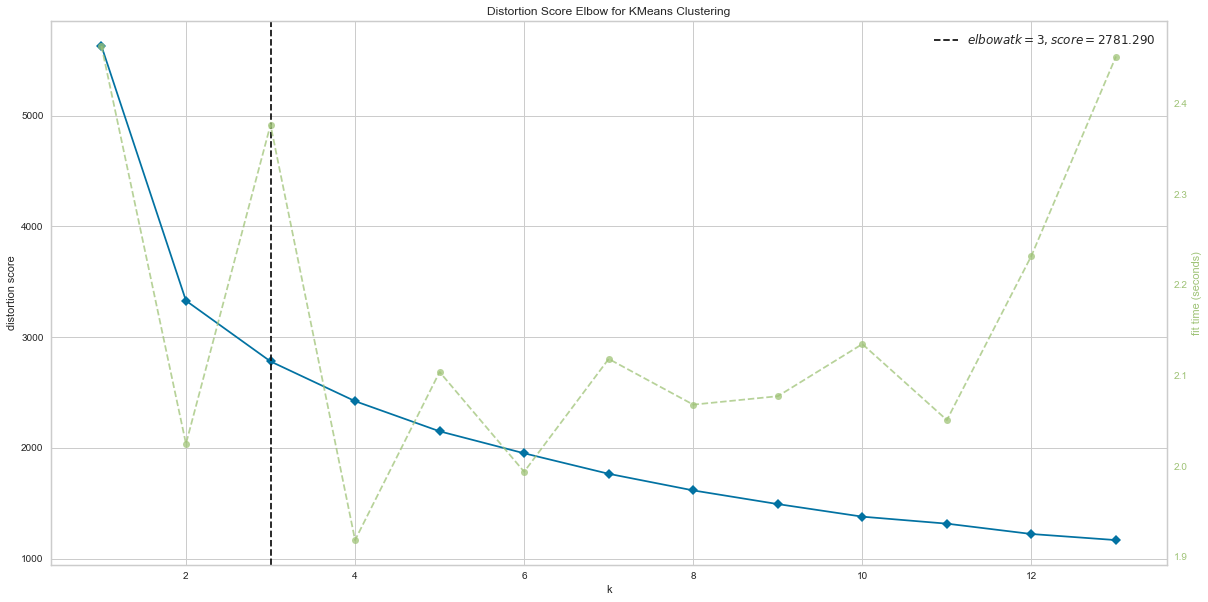

In [163]:
from sklearn.pipeline import make_pipeline
iter_ = IterativeImputer()
X = MinMaxScaler().fit_transform(data_impu)     #create new variable and scale imputed data
X = pd.DataFrame(X, columns=data.columns)       #convert the scaled imputed data into df
model = KMeans(
    init='k-means++',
    n_init=10,
    max_iter=200,
    tol=0.0001,
    precompute_distances='auto',
    verbose=2,
    random_state=None,
    copy_x=True,
    n_jobs=-1,
    algorithm='auto',)

pip = make_pipeline(iter_,model)
pip.fit_transform(X)



visualizer = KElbowVisualizer(model, k=(1,14))
visualizer.fit(X)
visualizer.show() 

In [ ]:
#generate heat map
modfit = KMeans(n_clusters=6,n_jobs=-1).fit(X)         #applying heat map to our imputed scaled data
labels = modfit.predict(X)                   
X['cluster_id'] = labels
X_ordered = X.sort_values(by='cluster_id')  #creating new data frame to store ordered clusters
plt.rcParams["figure.figsize"] = (20,10)     

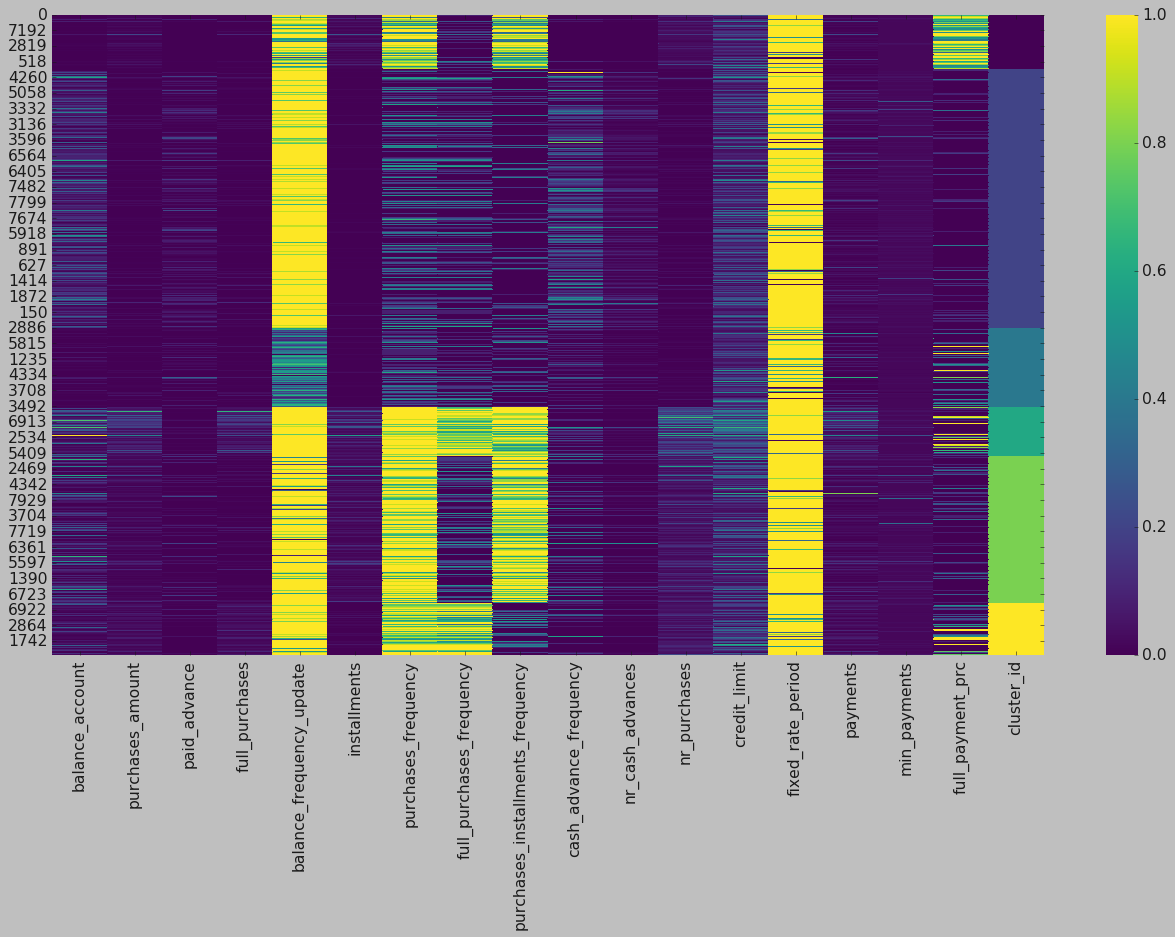

In [223]:
sns.heatmap(X_ordered,cmap="viridis",robust=True)

1. People that spend a lot (that have money) - balance_freq_update , purchases_frequency, fixed_rate_period
2. People that spend a lot that have less money - balance_freq_update , purchases_frequency,puchases_installment_period
3. 

In [221]:
X_ordered['cluster_id']=X_ordered.cluster_id/5

In [222]:
np.unique(X_ordered.cluster_id)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [182]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)


#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

TypeError: '(array([False, False,  True, ...,  True,  True, False]), 0)' is an invalid key

### Hierarchical Clustering

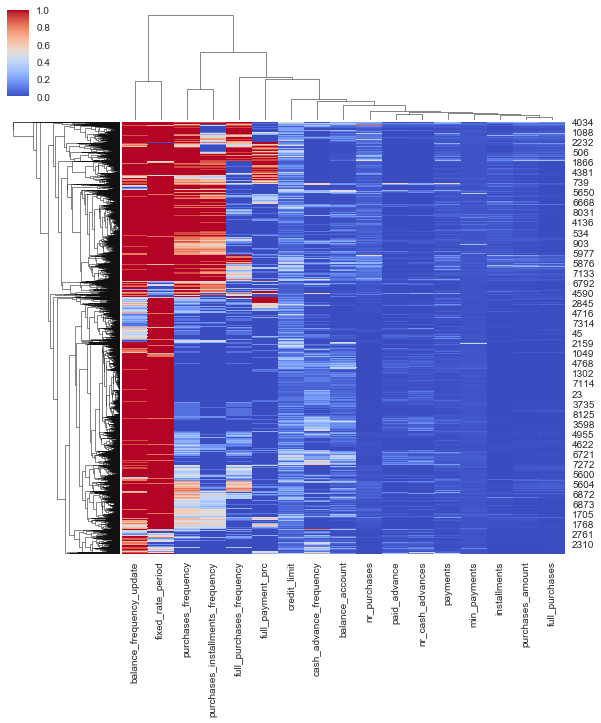

In [173]:
#Hierachical cluster applied to imputed data that has been scaled
#we do not pass clustered data with cluster_id into sns.clustermap since it clusters 
#automatically


X2 = MinMaxScaler().fit_transform(data_impu)     #create new variable and scale imputed data
X2 = pd.DataFrame(X2, columns=data.columns)       #convert the scaled imputed data into df



sns.clustermap(X2,cmap="coolwarm")

In [175]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)
dbscan.fit(X2)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [176]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 0, 'Income / spend')

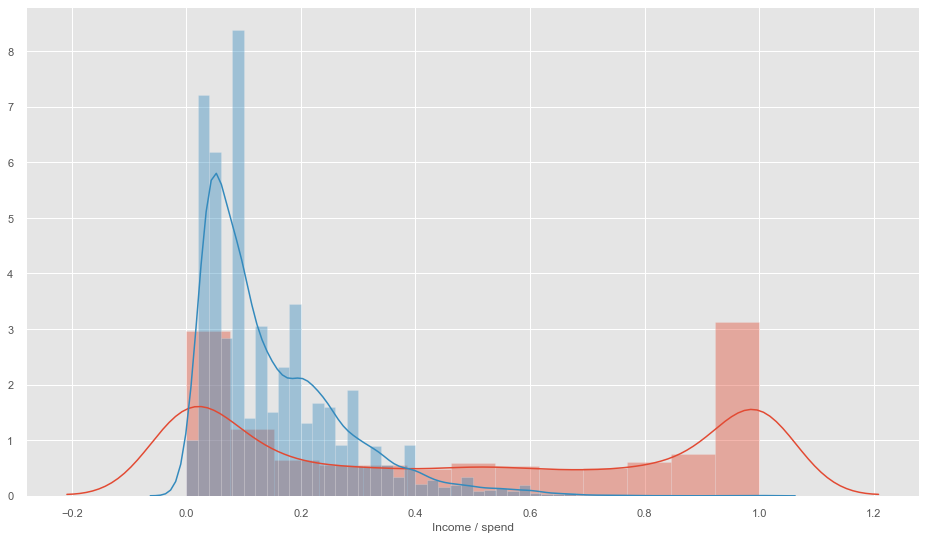

In [178]:
#Visualizing the data - displot
plot_income = sns.distplot(X2["purchases_frequency"])
plot_spend = sns.distplot(X2["credit_limit"])
plt.xlabel('Income / spend')

In [190]:
def plot_correlation_matrix(df):
    fig, ax = plt.subplots(figsize=(16,12))
    mat = ax.matshow(df.corr(), cmap=plt.cm.RdBu)

    fig.colorbar(mat)

    ticks = range(len(df.columns))
    ax.set_xticks(ticks)
    ax.set_xticklabels(df.columns, 
                       rotation=50, 
                       horizontalalignment = 'left', 
                       verticalalignment='bottom')

    ax.set_yticks(ticks)
    ax.set_yticklabels(df.columns, 
                       rotation=0, 
                       horizontalalignment = 'right', 
                       verticalalignment='bottom')
    None

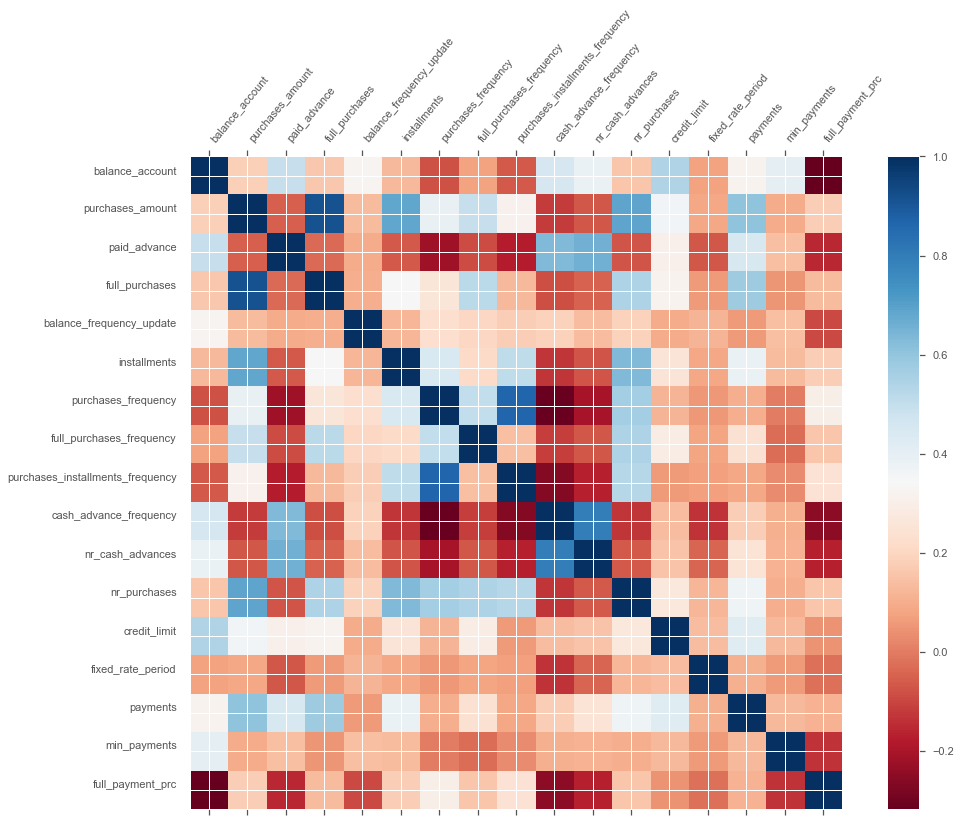

In [191]:
plot_correlation_matrix(X2)

In [201]:
def plot_3D(data_3D, labels=None, **kwargs):
    fig_ = plt.figure(figsize=(10,8))
    ax = Axes3D(fig_)
    ax.scatter(data_3D.iloc[:, 0], data_3D.iloc[:, 1], data_3D.iloc[:, 2], c=labels, **kwargs) 
    return ax

def plot_clusters_3D(data_, centers_, labels=None):
    fig = plt.figure(figsize=(10,10))
    ax3d = Axes3D(fig)
    ax3d.scatter(data_.iloc[:, 0], data_.iloc[:, 1], data_.iloc[:, 2], c = labels, alpha=0.2)
    ax3d.scatter(centers_.loc[0], centers_.loc[0], centers_.loc[0], marker = "*", c = 'red', s=300, alpha=1)
    ax3d.set_xlabel(cols[0])
    ax3d.set_ylabel(cols[1])
    ax3d.set_zlabel(cols[2])
    return

def kmeans_clusters_3D(data_, n_clusters):
    
    km_ = KMeans(n_clusters)
    km_.fit(data_)

    plot_3D(data_, km_.labels_.astype(float))
    
    return

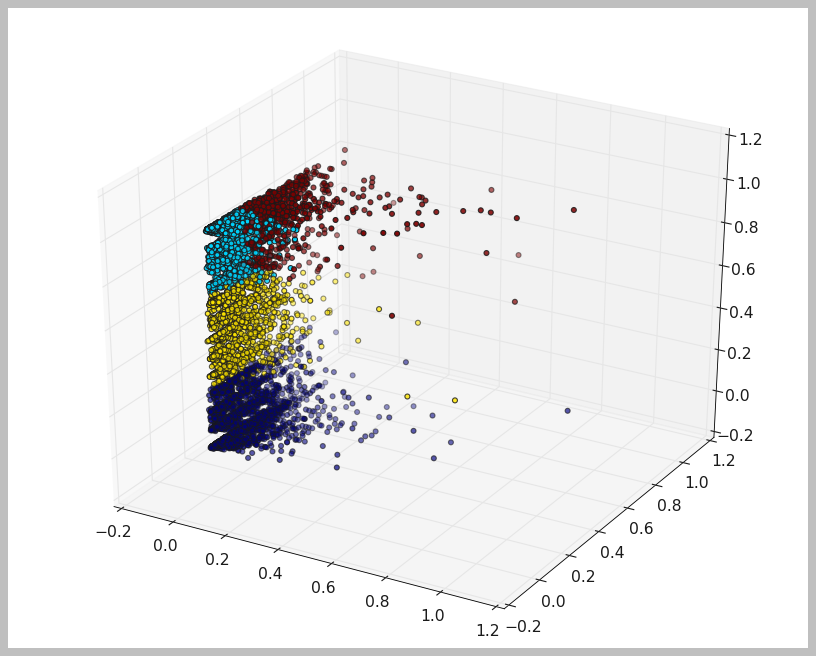

In [206]:
plt.style.use('classic')
plt.rcParams["figure.figsize"] = (12, 8) #Change matplotlib Box Size
plt.rcParams["font.size"] = 14 #Change matplotlib Font Size
kmeans_clusters_3D(X2[['payments', 'credit_limit', 'purchases_frequency']], 4)